In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [2]:
#imports
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


RUTA = pathlib.Path(__vsc_ipynb_file__).parent.parent # type: ignore

data = pd.read_csv(f"{RUTA}/notebooks/df_listo.csv", encoding='latin1', sep=',', on_bad_lines='skip')
data.shape

/var/folders/f_/5hywl__n0q183x7_820b9hrw0000gn/T/ipykernel_4902/1830693135.py:11: DtypeWarning: Columns (8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"{RUTA}/notebooks/df_listo.csv", encoding='latin1', sep=',', on_bad_lines='skip')


(1984473, 35)

In [3]:
print("*************************************************\n")

print(f"Valores dupllicados: {data.duplicated().sum()}\n")
print("*************************************************\n")

print("Valores nulos: \n")
print(data.isnull().sum())

print("*************************************************\n")
print(data.info())

*************************************************

Valores dupllicados: 163651

*************************************************

Valores nulos: 

Amount                         163955
Is_Fraud                       163955
IngresoPerCapita               163955
IngresoAnual                   163955
DebitoTotal                    163955
FICO_Score                     163955
Year                           163955
Month                          163955
Dia_Semana                     163955
Time                           163955
BancoCredito                   163955
TipoTarjeta                    163955
LimiteCredito                  163955
Errors_Bad CVV                 163955
Errors_Bad Card Number         163955
Errors_Bad Expiration          163955
Errors_Bad PIN                 163955
Errors_Bad Zipcode             163955
Errors_Insufficient Balance    163955
Errors_SIN ERROR               163955
Errors_Technical Glitch        163955
Dia_Semana_Domingo             163955
Dia_Semana_Jueve

In [4]:
new_data = data.drop(columns=['Dia_Semana','Time','BancoCredito','TipoTarjeta'])

In [5]:
print(new_data.shape)
print(pd.Series(new_data['Is_Fraud']).value_counts())

(1984473, 31)
Is_Fraud
0.0    1818662
1.0       1856
Name: count, dtype: int64


In [6]:
new_data = new_data.dropna()

In [7]:
print("*************************************************\n")

print(f"Valores duplicados: {new_data.duplicated().sum()}\n")
print("*************************************************\n")

print("Valores nulos: \n")
print(new_data.isnull().sum())

*************************************************

Valores duplicados: 691

*************************************************

Valores nulos: 

Amount                         0
Is_Fraud                       0
IngresoPerCapita               0
IngresoAnual                   0
DebitoTotal                    0
FICO_Score                     0
Year                           0
Month                          0
LimiteCredito                  0
Errors_Bad CVV                 0
Errors_Bad Card Number         0
Errors_Bad Expiration          0
Errors_Bad PIN                 0
Errors_Bad Zipcode             0
Errors_Insufficient Balance    0
Errors_SIN ERROR               0
Errors_Technical Glitch        0
Dia_Semana_Domingo             0
Dia_Semana_Jueves              0
Dia_Semana_Lunes               0
Dia_Semana_Martes              0
Dia_Semana_MiÃ©rcoles          0
Dia_Semana_SÃ¡bado             0
Dia_Semana_Viernes             0
BancoCredito_Amex              0
BancoCredito_Discover          

In [8]:
new_data[new_data.duplicated()]

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,LimiteCredito,Errors_Bad CVV,...,Dia_Semana_MiÃ©rcoles,Dia_Semana_SÃ¡bado,Dia_Semana_Viernes,BancoCredito_Amex,BancoCredito_Discover,BancoCredito_Mastercard,BancoCredito_Visa,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid)
300,10000.0,0.0,16920.0,34496.0,33122.0,731.0,1991.0,12.0,7300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
305,10000.0,0.0,16920.0,34496.0,33122.0,731.0,1991.0,12.0,7300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
812,10000.0,0.0,16920.0,34496.0,33122.0,731.0,1992.0,2.0,7300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2041,10000.0,0.0,16920.0,34496.0,33122.0,731.0,1992.0,9.0,7300.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2143,12000.0,0.0,16920.0,34496.0,33122.0,731.0,1992.0,10.0,7300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646897,327.0,0.0,14798.0,30172.0,39959.0,653.0,2018.0,11.0,87.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1651766,10000.0,0.0,18585.0,27864.0,1371.0,591.0,2019.0,4.0,3400.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1654084,4000.0,0.0,21728.0,44303.0,53407.0,696.0,2019.0,4.0,10600.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1656176,16000.0,0.0,28570.0,58248.0,107130.0,728.0,2019.0,7.0,11900.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [9]:
new_data=new_data.drop_duplicates(keep="first")

In [10]:
pd.Series(new_data['Is_Fraud']).unique()

array([0., 1.])

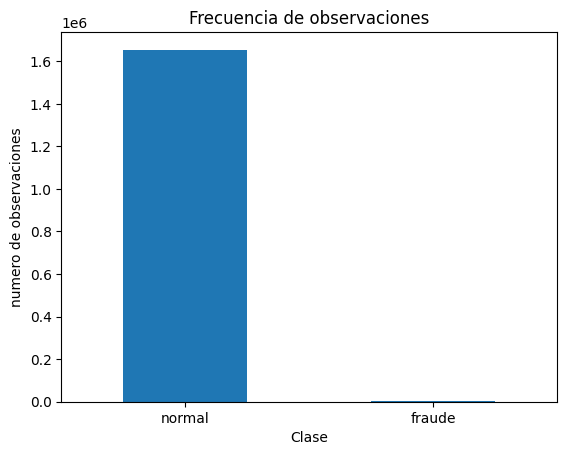

In [11]:
count_classes = pd.Series(new_data['Is_Fraud']).value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(pd.Series(new_data['Is_Fraud']).unique(),labels=['normal', 'fraude'])
plt.title("Frecuencia de observaciones")
plt.xlabel("Clase")
plt.ylabel("numero de observaciones");

Modelo